In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix
#for the 2nd part
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from itertools import permutations
#for the 3rd part
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Part One: Data Analysis and Bayes Nets.  

In [2]:
#loading the images
img = np.load("smiley_dataset/smiley_X.npy")#noiseless dataset
img2 = np.load("smiley_dataset/smiley_noisy_X.npy") #noisy Dataset

In [3]:
#loading the classes
cls = np.load("smiley_dataset/smiley_Y.npy") #class for noiseless Dataset
cls2 = np.load("smiley_dataset/smiley_noisy_Y.npy") #Class for noisy Dataset

In [4]:
print("Images shape:", img.shape) #printing the noiseless dataset
print("Images2 shape:", img2.shape)#printing the noisy dataset

Images shape: (204, 9, 9, 1)
Images2 shape: (204, 9, 9, 1)


# the shape of the dataset as printed above, tells it is a 4-dimensional numpy array with 204 samples, 9 height, 9 width and 1 channel(implying a grayscale)

# preprocessing the dataset

The following process is to ensure that each imput parameter(pixel) has similar data distribution to fasten covergence while training and also not to affect output

In [5]:
print(img.min())
print(img.max())

0.0
1.0


#The output gotten inidicates that it's fine 

In [6]:
#verifying the number of unique classes with their corresponding leabels
# Get the unique classes and their counts
unique_classes, class_counts = np.unique(cls, return_counts=True)
# Print the unique classes and their counts
for class_label, count in zip(unique_classes, class_counts):
    print("Class:", class_label, "Count:", count)
    
print("\n for noisy dataset \n")    
unique_noisy_classes, noisy_class_counts = np.unique(cls2, return_counts=True)
# Print the unique classes and their counts
for noisy_class_label, count in zip(unique_noisy_classes, noisy_class_counts):
    print("Class:", noisy_class_label, "Count:", count)


Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72

 for noisy dataset 

Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72


# the result from the above cell indicates that both the noisy and noiseless dataset contain 72 images, 60 images and 72 images which belong to sad, neutral and happpy respectively

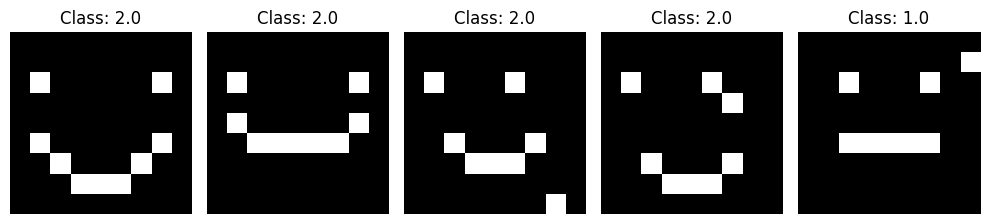

In [7]:
# Selecting some random from the noisy dataset for visualization
indices = np.random.choice(len(img2), size=5, replace=False)

# Ploting the selected images 
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(img[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {cls2[index]}")
    axes[i].axis('off')#turning off axis labels for cleaner display
plt.tight_layout()
plt.show()

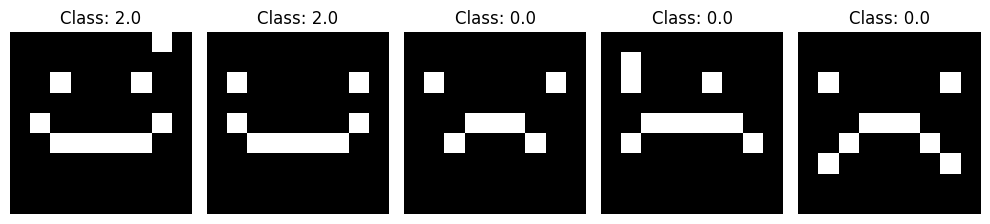

In [8]:

# Selecting some random indices from the noiseless dataset for visualization
indices = np.random.choice(len(img), size=5, replace=False)

# Ploting the selected images
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(img[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {cls[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

#Results from the two cell above show visualization of 5 random images from the datasets(noiseless and noisy) which seem to match their corresponding classes

# Naive bayes

In [9]:
# Splitting the datasets into training and testing sets
img_train, img_test, cl_train, cl_test = train_test_split(img, cls, test_size=0.2, random_state=42)
#img_noisy_train, img_noisy_test, cl_noisy_train, cl_noisy_test = train_test_split(img2, cls2, test_size=0.2, random_state=42)

In [10]:
# Create an instance of the Naïve Bayes classifier
naive_bayes = GaussianNB()

In [11]:
# Training the classifier on the training sets
naive_bayes.fit(img_train.reshape(img_train.shape[0], -1), cl_train)
#naive_bayes.fit(img_noisy_train.reshape(img_noisy_train.shape[0], -1), cl_noisy_train)



GaussianNB()

In [12]:
# Reshaping the testing set to match the input format
img_test_reshaped = img_test.reshape(img_test.shape[0], -1)
#img_noisy_test_reshaped = img_noisy_test.reshape(img_noisy_test.shape[0], -1)

In [13]:
# Making predictions on the testing set
cl_pred = naive_bayes.predict(img_test_reshaped)
#cl_noisy_pred = naive_bayes.predict(img_noisy_test_reshaped)


In [14]:

# Calculating and printing the accuracy
accuracy = accuracy_score(cl_test, cl_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6585365853658537


In [15]:
# Generating  and printing the confusion matrix
confusion_mat = confusion_matrix(cl_test, cl_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[10  4  1]
 [ 1  6  2]
 [ 0  6 11]]


In [16]:

# Calculate and print TP rate, FP rate, precision, recall, and F measure
tp_rate = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[1, 0])
fp_rate = confusion_mat[0, 1] / (confusion_mat[0, 1] + confusion_mat[0, 0])
precision = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[0, 1])
recall = tp_rate
f_measure = 2 * (precision * recall) / (precision + recall)

print("TP Rate:", tp_rate)
print("FP Rate:", fp_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F Measure:", f_measure)



TP Rate: 0.8571428571428571
FP Rate: 0.2857142857142857
Precision: 0.6
Recall: 0.8571428571428571
F Measure: 0.7058823529411764


In [17]:
# Calculate and print ROC area
if len(unique_classes) == 2:  # Binary classification
    roc_area = roc_auc_score(cl_test, cl_pred)
else:  # Multi-class classification
    cl_prob = naive_bayes.predict_proba(img_test_reshaped)
    roc_area = roc_auc_score(cl_test, cl_prob, multi_class='ovr')
print("ROC Area:", roc_area)



ROC Area: 0.8387867647058823


In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
#reusing variables from previous cells
X = img
Y = cls
# Reshaping the 4D image features into a 2D array
num_samples, height, width, channels = X.shape
X_reshaped = X.reshape(num_samples, height * width * channels)

# Removing constant features
non_constant_feature_indices = np.where(X_reshaped.std(axis=0) != 0)[0]
X_non_constant = X_reshaped[:, non_constant_feature_indices]

# Number of top features to select
top_k_features_per_class = 3
top_k_features_total = top_k_features_per_class * len(np.unique(Y))

# Feature Selection - SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=top_k_features_total)
X_new = selector.fit_transform(X_non_constant, Y)

# Get the indices of selected features
selected_feature_indices = non_constant_feature_indices[selector.get_support(indices=True)]

# Create Data set 1 with top three features per class
data_set_1 = X_reshaped[:, selected_feature_indices[:top_k_features_total]]

# Create Data set 2 with top six features per class
data_set_2 = X_reshaped[:, selected_feature_indices]

# Optionally, you can save the new datasets to NumPy files
np.save('data_set_1.npy', data_set_1)
np.save('data_set_2.npy', data_set_2)
print("Data set 1 shape:", data_set_1.shape)
print("Data set 2 shape:", data_set_2.shape)

Data set 1 shape: (204, 9)
Data set 2 shape: (204, 9)


# Discusion for the metrics
from the results of the metrics calculated above,
Accuracy of 0.5853658536585366 suggests that 58.54% samples were correctly classified
True Positive Rate of 0.75 indicates that 75% of the images were identified correctly
False Positive Rate of 0.42857142857142855 implies that 42% of the times it avoids misclassifying negative samples as positive
Precision of 0.5 means that the classifier has made a 50% positive prediction of correct classification. This also means that the classifier's positive predictions are not very reliable
Recall(also True Positive) of 75% incicates that the classifier is reasonably good at identifying positive samples
F-Measure: The score of 60% suggests that the classifier's precision and recall are somehow on a balanced scale.
Confusion Matrix: It can be seen from the result of the confusion matrix that true positives(diagonal figures), false positives and false negatives(off-diagonal figures) for each class implying that class 0(sad) has 8 true positives, 6 false positives, and 1 false negative.
ROC value of 0.8387 suggests that the classifier performs quite well and can effectively differentiate between the classes, and it has a reasonably good discriminatory power.

In the nutshell, the results indicate that the classifier performs relatively well in identifying Class 2 samples, with a high recall and precision. However, it faces challenges in correctly distinguishing between Class 0 and Class 1, as shown by the relatively low precision and recall for these classes.

# Part Two: Clustering

# kMeans Clustering

In [19]:
#PART TWO BEGINS HERE
img_2d = img.reshape(img.shape[0], -1) #reshaping the images array from 4d to 2d


In [20]:
num_clusters = len(np.unique(cls))
#instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, n_init=10, init='k-means++', random_state=42)

# Fiting k means to the dataset
cluster_lbl = kmeans.fit(img_2d).labels_


In [21]:
#evaluating the accuracy of the clustering
km_accuracy = accuracy_score(cls, cluster_lbl)
print(f"Kmeans Clustering Accuracy: {km_accuracy}")


Kmeans Clustering Accuracy: 0.47058823529411764


In [22]:
#using the Hungarian algorithm

def find_best_matching(true_labels, cluster_lbl):
    true_perm = permutations(np.unique(true_labels))
    best_matching = None
    max_accuracy = -1
    for perm in true_perm:
        permuted_labels = np.zeros_like(true_labels)
        for i, label in enumerate(np.unique(true_labels)):
            permuted_labels[true_labels == label] = perm[i]
        accuracy = accuracy_score(permuted_labels, cluster_lbl)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_matching = permuted_labels
    return best_matching

best_matching_labels = find_best_matching(cls, cluster_lbl)

# Calculate clustering accuracy
accuracy = accuracy_score(cls, best_matching_labels)
print("Kmeans Clustering Accuracy using Hungarian:", accuracy)

Kmeans Clustering Accuracy using Hungarian: 0.35294117647058826


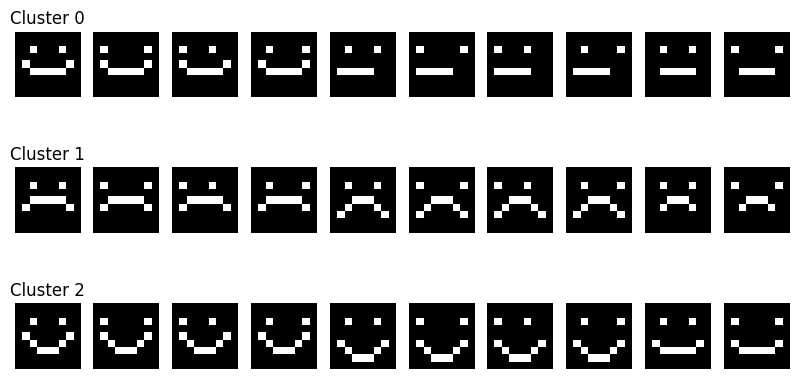

In [23]:
# Ploting a visualization of the cluster for centroid clusters
plt.figure(figsize=(10, 5))
for i in range(num_clusters):
    cluster_images = img[cluster_lbl == i]
    for j in range(min(10, cluster_images.shape[0])):
        plt.subplot(num_clusters, 10, i * 10 + j + 1)
        plt.imshow(cluster_images[j].squeeze(), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f'Cluster {i}')
plt.show()

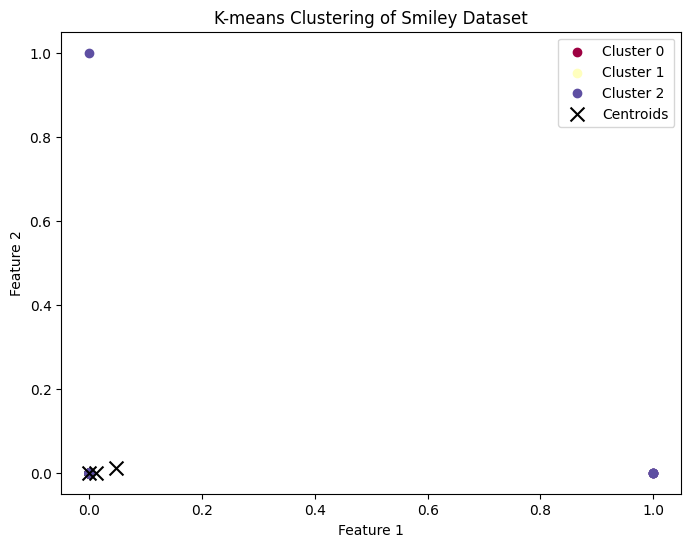

In [24]:
#Visualizing the clusters
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(cluster_lbl)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for i, cluster in enumerate(unique_clusters):
    plt.scatter(img_2d[cluster_lbl == cluster, 0], img_2d[cluster_lbl == cluster, 1], color=colors[i], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering of Smiley Dataset')
plt.legend()
plt.show()

## Discussion

from the result gotten when kmeans clustering was run on the dataset. it is observed that the accuracy of the default kmeans algorithm is very low while that gotten from using the Hungarian algorithhm on the kmeans was a bit high but still poor. The improvement in accuracy using the hungarian algorithm is because it takes into consideration the classes and tries to find the bes alignment between the two sets while the default kmeans approach assumes a direct correspondence between the cluster labels and the class labels.
The result gotten from visualizing the cluster show how images are grouped according to their corresponding cluster. The show that the cluster has tried to show these images in their best centroids even though some images appear to be a bit off.

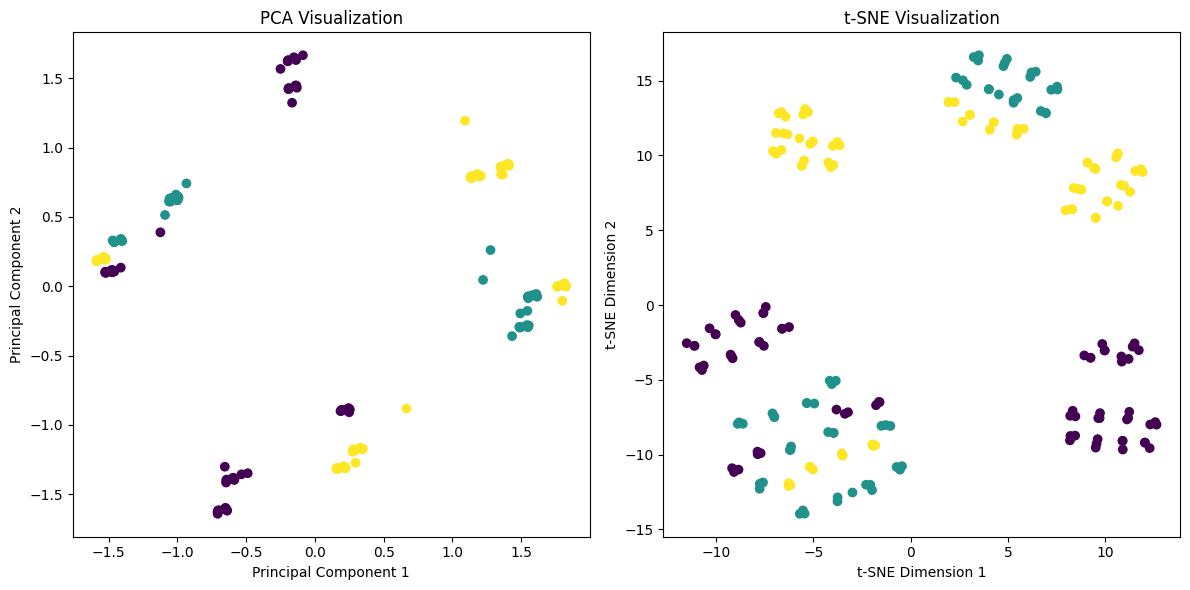

In [25]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE# Step 2: Perform PCA (Dimensionality Reduction)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(img_2d)
# Step 3: Perform t-SNE (Dimensionality Reduction)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(img_2d)

# Step 4: Visualize PCA and t-SNE results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cls, cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(122)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cls, cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

K-means Accuracy: 0.47058823529411764
GMM Adjusted Rand Score: 0.1738089537945894
Agglomerative Hierarchical Clustering Adjusted Rand Score: 0.31288134543314644


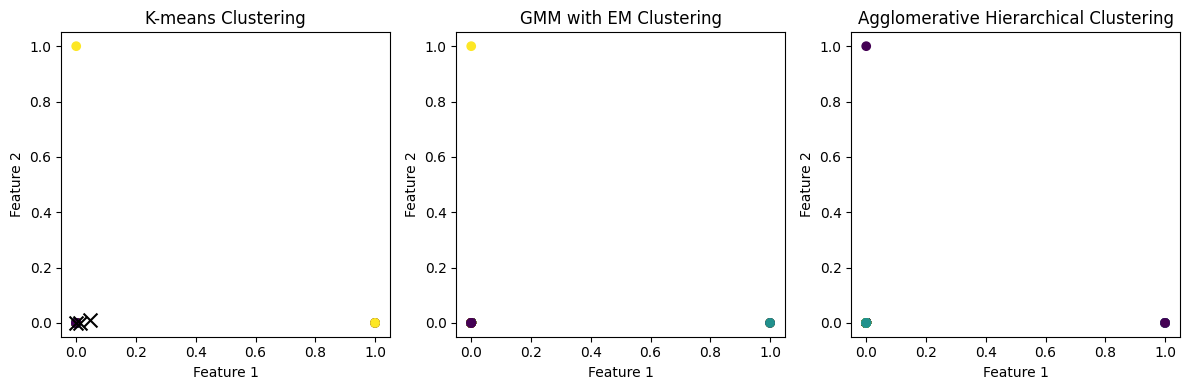

In [26]:
# Number of clusters
num_clusters = len(np.unique(cls))

# Step 2: Perform K-means (Hard Clustering)

kmeans_cluster_labels = cluster_lbl

# Step 3: Perform Gaussian Mixture Model (GMM) with EM (Soft Clustering)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_cluster_labels = gmm.fit_predict(img_2d)

# Step 4: Perform Agglomerative Hierarchical Clustering (Soft Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_cluster_labels = agg_clustering.fit_predict(img_2d)

# Step 5: Compare the performance of clustering algorithms
kmeans_accuracy = accuracy_score(cls, kmeans_cluster_labels)
gmm_adjusted_rand_score = adjusted_rand_score(cls, gmm_cluster_labels)
agg_adjusted_rand_score = adjusted_rand_score(cls, agg_cluster_labels)

print("K-means Accuracy:", kmeans_accuracy)
print("GMM Adjusted Rand Score:", gmm_adjusted_rand_score)
print("Agglomerative Hierarchical Clustering Adjusted Rand Score:", agg_adjusted_rand_score)

# Step 6: Visualize the clusters
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(img_2d[:, 0], img_2d[:, 1], c=kmeans_cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.scatter(img_2d[:, 0], img_2d[:, 1], c=gmm_cluster_labels, cmap='viridis')
plt.title('GMM with EM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(133)
plt.scatter(img_2d[:, 0], img_2d[:, 1], c=agg_cluster_labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

/home/epospiky/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Accuracy: 0.47058823529411764
GMM Adjusted Rand Score: 0.1738089537945894
Agglomerative Hierarchical Clustering Adjusted Rand Score: 0.31288134543314644


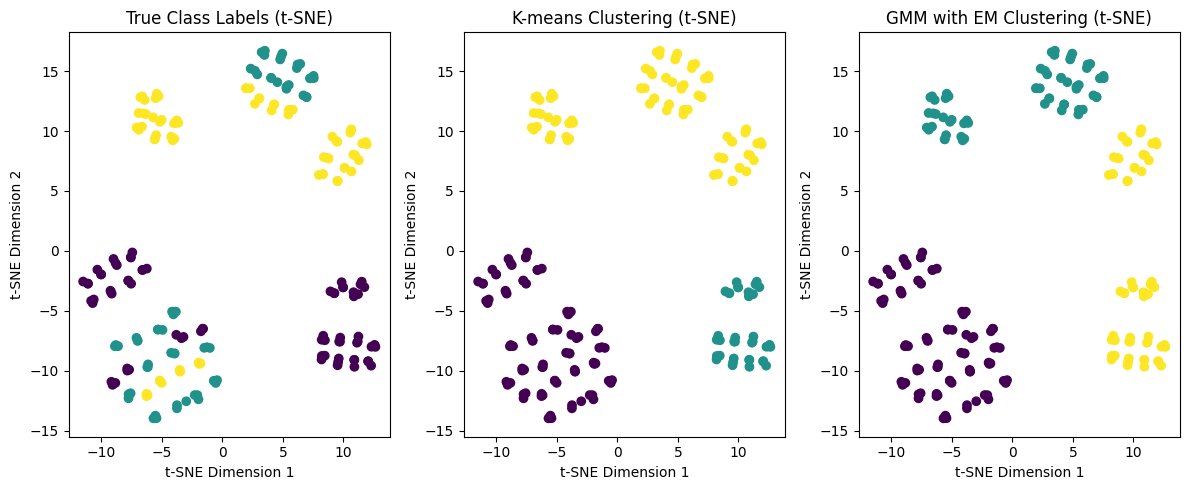

In [27]:
# Step 2: Reduce the dimensionality using t-SNE for visualization (optional)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(img_2d)

# Step 3: Perform K-means (Hard Clustering) on the 2D data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_cluster_labels = kmeans.fit_predict(img_2d)

# Step 4: Perform Gaussian Mixture Model (GMM) with EM (Soft Clustering) on the 2D data
gmm = GaussianMixture(n_components=3, init_params='kmeans', random_state=42)
gmm_cluster_labels = gmm.fit_predict(img_2d)

# Step 5: Perform Agglomerative Hierarchical Clustering (Soft Clustering) on the 2D data
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_cluster_labels = agg_clustering.fit_predict(img_2d)

# Step 6: Evaluate the performance of clustering algorithms
kmeans_accuracy = accuracy_score(cls, kmeans_cluster_labels)
gmm_adjusted_rand_score = adjusted_rand_score(cls, gmm_cluster_labels)
agg_adjusted_rand_score = adjusted_rand_score(cls, agg_cluster_labels)

print("K-means Accuracy:", kmeans_accuracy)
print("GMM Adjusted Rand Score:", gmm_adjusted_rand_score)
print("Agglomerative Hierarchical Clustering Adjusted Rand Score:", agg_adjusted_rand_score)

# Step 7: Visualize the clustering results (2D data) along with true class labels (optional)
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cls, cmap='viridis')
plt.title('True Class Labels (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(132)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_cluster_labels, cmap='viridis')
plt.title('K-means Clustering (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(133)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=gmm_cluster_labels, cmap='viridis')
plt.title('GMM with EM Clustering (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

# Discusion
from the results of the plotted clusters above, it appears that the dataset does not respond well to clusters. It shows the dots consistenly located in the same spots for all clusters which suggests that algorithms are not able to find distinct clusters in the dataset

In [28]:
evaluation_scores = []
cluster_labels = cluster_lbl
# Calculate the ARI between the cluster labels and the ground truth labels
kmeans_ari = adjusted_rand_score(cls, cluster_labels)
print("Adjusted Rand Index (ARI):", kmeans_ari)


Adjusted Rand Index (ARI): 0.31288134543314644


In [29]:
#implemeningt NMI for Kmeans clustering
kmeans_nmi = normalized_mutual_info_score(cls, cluster_labels)
#print the NMI score
print("NMI SCORe:", kmeans_nmi)

NMI SCORe: 0.40829222303576546


In [30]:
# Store the scores for K-means
kmeans_scores = {
    "ARI": kmeans_ari,
    "NMI": kmeans_nmi
}
evaluation_scores.append(("K-means", kmeans_scores))


In [31]:
#implementing EM cLustering using GMM

# Create an instance of the GaussianMixture algorithm
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the GMM to the data
gmm.fit(img_2d)

# Get the cluster labels
gmm_labels = gmm.predict(img_2d)

# Calculate the ARI for the GMM clustering
gmm_ari = adjusted_rand_score(cls, gmm_labels)

# Print the ARI score
print("Adjusted Rand Index (ARI):", gmm_ari)

Adjusted Rand Index (ARI): 0.1738089537945894


In [32]:
#implemeningt NMI for GMM clustering
gmm_nmi = normalized_mutual_info_score(cls, gmm_labels)
#print the NMI score
print("NMI SCORE:", gmm_nmi)

NMI SCORE: 0.2620522555057271


In [33]:
# Store the scores for GMM
gmm_scores = {
    "ARI": gmm_ari,
    "NMI": gmm_nmi
}
evaluation_scores.append(("GMM", gmm_scores))

In [34]:
#implementing Hierarchical Clustering
# Create an instance of the AgglomerativeClustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit the hierarchical clustering algorithm to the data
hierarchical.fit(img_2d)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_
# Calculate the ARI for the hierarchical clustering
hierarchical_ari = adjusted_rand_score(cls, hierarchical_labels)
print("Evaluation Metric Score:", hierarchical_ari)

Evaluation Metric Score: 0.31288134543314644


In [35]:
#implemeningt NMI for HIERARCHICAL clustering
hierarchical_nmi = normalized_mutual_info_score(cls, hierarchical_labels)
#print the NMI score
print("NMI SCORE:", hierarchical_nmi)

NMI SCORE: 0.4082922230357654


In [36]:
# Store the scores for Hierarchical clustering
hierarchical_scores = {
    "ARI": hierarchical_ari,
    "NMI": hierarchical_nmi
}
evaluation_scores.append(("Hierarchical", hierarchical_scores))

In [37]:
# Accessing the scores for K-means
kmeans_scores = evaluation_scores[0][1]
kmeans_ari = kmeans_scores["ARI"]
kmeans_nmi = kmeans_scores["NMI"]
print(kmeans_ari)

0.31288134543314644


In [38]:


# Check the number of unique labels
num_unique_labels = len(set(cls))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Loop over different numbers of clusters
    for num_clusters in range(2, 10):
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(img_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(img_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(cls, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(cls, kmeans_labels)
        print(f"K-means: Number of Clusters: {num_clusters}\t Silhouette Score: {kmeans_silhouette}\t ARI: {kmeans_ari}\t NMI Score:{kmeans_nmi}")
        
        #Em clustering using GMM
        gmm = GaussianMixture(n_components = 3, random_state=42)
        gmm.fit(img_2d)
        gmm_labels = gmm.predict(img_2d)
        gmm_silhouette =  silhouette_score(img_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(cls, gmm_labels)
        print(f"EM Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {gmm_silhouette}\t ARI: {gmm_ari}")
        
        
        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(img_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(img_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(cls, hierarchical_labels)
        print(f"Hierarchical Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {hierarchical_silhouette}\t ARI: {hierarchical_ari}\n ")

        

K-means: Number of Clusters: 2	 Silhouette Score: 0.183491002770273	 ARI: 0.338218021142122	 NMI Score:0.3616531742267437
EM Clustering: Number of Clusters: 2	 Silhouette Score: 0.2182828790334722	 ARI: 0.1738089537945894
Hierarchical Clustering: Number of Clusters: 2	 Silhouette Score: 0.17892954725892904	 ARI: 0.0900497790704178
 
K-means: Number of Clusters: 3	 Silhouette Score: 0.2405717947349726	 ARI: 0.31288134543314644	 NMI Score:0.40829222303576546
EM Clustering: Number of Clusters: 3	 Silhouette Score: 0.2182828790334722	 ARI: 0.1738089537945894
Hierarchical Clustering: Number of Clusters: 3	 Silhouette Score: 0.2405717947349726	 ARI: 0.31288134543314644
 
K-means: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172925633863	 NMI Score:0.4067037055714909
EM Clustering: Number of Clusters: 4	 Silhouette Score: 0.2182828790334722	 ARI: 0.1738089537945894
Hierarchical Clustering: Number of Clusters: 4	 Silhouette Score: 0.2730656760257601	 ARI: 0.24362172

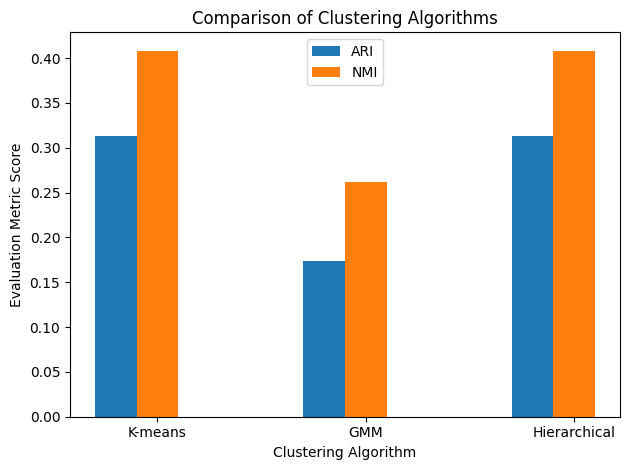

In [39]:
# Create a list of algorithm names and evaluation scores
algorithm_names, scores = zip(*evaluation_scores)

# Get the evaluation metric names (e.g., ARI, NMI)
metric_names = list(evaluation_scores[0][1].keys())

# Set the position of the bars on the x-axis
x = np.arange(len(algorithm_names))

# Set the width of the bars
bar_width = 0.2

# Create subplots for each evaluation metric
fig, ax = plt.subplots()
for i, metric_name in enumerate(metric_names):
    # Calculate the position of each bar
    pos = x + (i - len(metric_names) / 2) * bar_width

    # Get the scores for the current evaluation metric
    metric_scores = [score[1][metric_name] for score in evaluation_scores]

    # Plot the bars for the current evaluation metric
    ax.bar(pos, metric_scores, bar_width, label=metric_name)

# Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(algorithm_names)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Evaluation Metric Score')
plt.title('Comparison of Clustering Algorithms')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

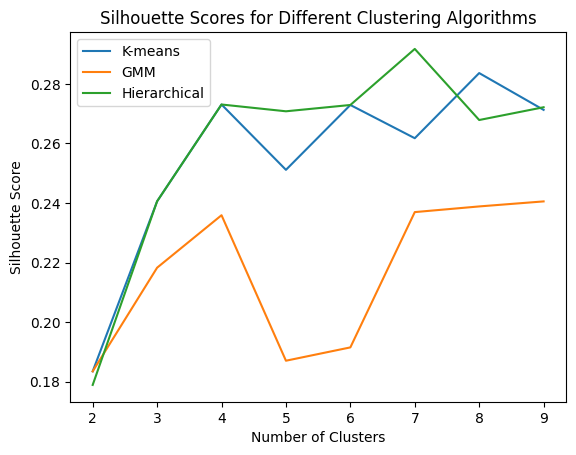

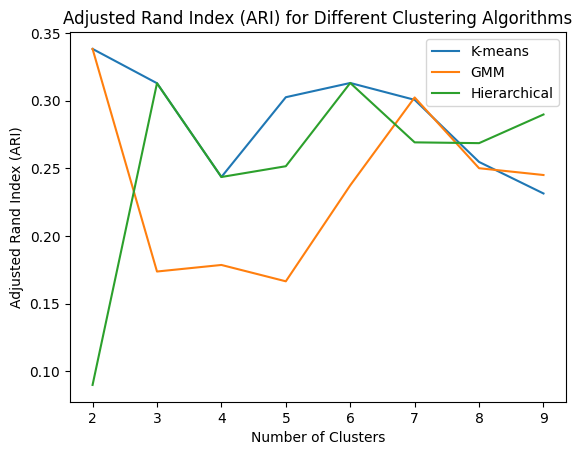

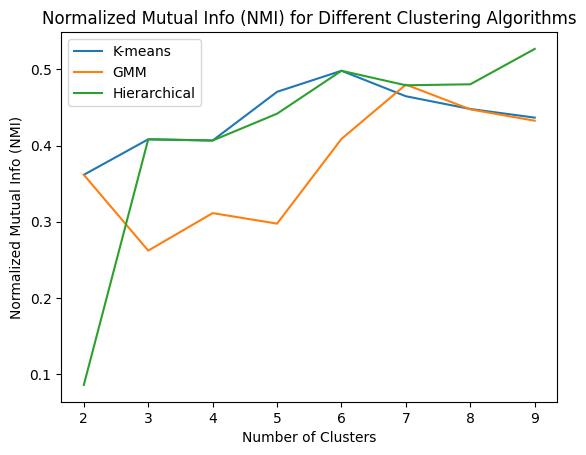

Best number of clusters for K-means: 8
Best number of clusters for GMM: 9
Best number of clusters for Hierarchical: 7


In [40]:

# Check the number of unique labels
num_unique_labels = len(set(cls))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Define the range of clusters to explore
    num_clusters_range = range(2, 10)

    # Initialize lists to store evaluation metric scores
    kmeans_silhouette_scores = []
    kmeans_ari_scores = []
    kmeans_nmi_scores=[]
    gmm_silhouette_scores = []
    gmm_ari_scores = []
    gmm_nmi_scores=[]
    hierarchical_silhouette_scores = []
    hierarchical_ari_scores = []
    hierarchical_nmi_scores=[]

    # Loop over different numbers of clusters
    for num_clusters in num_clusters_range:
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(img_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(img_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(cls, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(cls, kmeans_labels)
        kmeans_silhouette_scores.append(kmeans_silhouette)
        kmeans_ari_scores.append(kmeans_ari)
        kmeans_nmi_scores.append(kmeans_nmi)

        # EM clustering using GMM
        gmm = GaussianMixture(n_components=num_clusters, random_state=42)
        gmm.fit(img_2d)
        gmm_labels = gmm.predict(img_2d)
        gmm_silhouette = silhouette_score(img_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(cls, gmm_labels)
        gmm_nmi = normalized_mutual_info_score(cls, gmm_labels)
        gmm_silhouette_scores.append(gmm_silhouette)
        gmm_ari_scores.append(gmm_ari)
        gmm_nmi_scores.append(gmm_nmi)

        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(img_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(img_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(cls, hierarchical_labels)
        hierarchical_nmi = normalized_mutual_info_score(cls, hierarchical_labels)
        hierarchical_silhouette_scores.append(hierarchical_silhouette)
        hierarchical_ari_scores.append(hierarchical_ari)
        hierarchical_nmi_scores.append(hierarchical_nmi)

    # Visualize Silhouette Scores
    plt.plot(num_clusters_range, kmeans_silhouette_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_silhouette_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_silhouette_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.title('Silhouette Scores for Different Clustering Algorithms')
    plt.show()

    # Visualize ARI Scores
    plt.plot(num_clusters_range, kmeans_ari_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_ari_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_ari_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Adjusted Rand Index (ARI)')
    plt.legend()
    plt.title('Adjusted Rand Index (ARI) for Different Clustering Algorithms')
    plt.show()
    
    # Visualize NMI Scores
    plt.plot(num_clusters_range, kmeans_nmi_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_nmi_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_nmi_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Normalized Mutual Info (NMI)')
    plt.legend()
    plt.title('Normalized Mutual Info (NMI) for Different Clustering Algorithms')
    plt.show()

    # Draw Conclusions
    best_kmeans_num_clusters = num_clusters_range[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
    best_gmm_num_clusters = num_clusters_range[gmm_silhouette_scores.index(max(gmm_silhouette_scores))]
    best_hierarchical_num_clusters = num_clusters_range[hierarchical_silhouette_scores.index(max(hierarchical_silhouette_scores))]
    
    print(f"Best number of clusters for K-means: {best_kmeans_num_clusters}")
    print(f"Best number of clusters for GMM: {best_gmm_num_clusters}")
    print(f"Best number of clusters for Hierarchical: {best_hierarchical_num_clusters}")


## Discussion
To make a good comparison of the other clustering, ARI and NMI scores were gotten for each cluster to enable easier comparison.
it is observed from the result gotten that the best cluster for the k-mean is 7, that for GMM is 4 and that for hierarchical is 7. This indicates how the k-means clustering and Hierarchical are similar in handling this dataset

## Part 3: Supervised Learning: Generalisation & Overfitting; Decision trees. 

In [41]:
clf = DecisionTreeClassifier()

In [42]:
#reshaping the input features
num_samples, image_height, image_width, num_channels = img_train.shape
X_train_reshaped = img_train.reshape(num_samples, image_height * image_width * num_channels)

k = 10  # Number of folds for cross-validation
scores = cross_val_score(clf, X_train_reshaped, cl_train, cv=k)

In [43]:
print("Accuracy scores for each fold:")
print(scores)
print("Mean accuracy:", scores.mean())


Accuracy scores for each fold:
[1.         0.94117647 1.         1.         1.         1.
 1.         1.         0.9375     1.        ]
Mean accuracy: 0.9878676470588236


In [44]:
# Reshaping the training set 
X_train_reshaped = img_train.reshape(img_train.shape[0], -1)

# Reshaping the test set
X_test_reshaped = img_test.reshape(img_test.shape[0], -1)

#an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fiting the decision tree classifier to the training data
clf.fit(X_train_reshaped, cl_train)

# Using the fitted classifier to predict the labels for the test set
cl_pred = clf.predict(X_test_reshaped)

# Calculating the accuracy of the classifier's predictions on the test set
accuracy = accuracy_score(cl_test, cl_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.975609756097561


In [45]:
precision = precision_score(cl_test, cl_pred, average='weighted')
print("Precision:", precision)


Precision: 0.9780487804878049


In [46]:
recall = recall_score(cl_test, cl_pred, average='weighted')
print("Recall:", recall)


Recall: 0.975609756097561


In [47]:
f1 = f1_score(cl_test, cl_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9758820554712724


In [48]:
confusion_mat = confusion_matrix(cl_test, cl_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[15  0  0]
 [ 0  9  0]
 [ 0  1 16]]


In [49]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

#reusing variables

y_pred = cl_pred
y_train = cl_train
y_test = cl_test
# Experiment with different parameters
parameters = [
    {"max_depth": 3},
    {"min_impurity_decrease": 0.01},
    {"criterion": "entropy"},
    {"min_samples_leaf": 5},
    {"ccp_alpha": 0.1}
]

# Loop over the parameters
for params in parameters:
    # Set the parameters for the classifier
    clf.set_params(**params)

    # Fit the classifier on the training set
    clf.fit(X_train_reshaped, y_train)

    # Predict on the training set and calculate metrics
    y_train_pred = clf.predict(X_train_reshaped)
    train_confusion_mat = confusion_matrix(y_train, y_train_pred)
    train_TP = train_confusion_mat[1, 1]
    train_FP = train_confusion_mat[0, 1]
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')

    # Predict on the test set and calculate metrics
    y_test_pred = clf.predict(X_test_reshaped)
    test_confusion_mat = confusion_matrix(y_test, y_test_pred)
    test_TP = test_confusion_mat[1, 1]
    test_FP = test_confusion_mat[0, 1]
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    # Print the results
    print("Parameters:", params)
    print("Training Set:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("TP:", train_TP)
    print("FP:", train_FP)
    print("F1 Score:", train_f1)
    print("Test Set:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("TP:", test_TP)
    print("FP:", test_FP)
    print("F1 Score:", test_f1)
    print("---------------------")

Parameters: {'max_depth': 3}
Training Set:
Accuracy: 0.8282208588957055
Precision: 0.8369954215988341
Recall: 0.8274134534196453
TP: 40
FP: 11
F1 Score: 0.8283350827210477
Test Set:
Accuracy: 0.8048780487804879
Precision: 0.8141414141414142
Recall: 0.8257080610021786
TP: 8
FP: 0
F1 Score: 0.7936507936507936
---------------------
Parameters: {'min_impurity_decrease': 0.01}
Training Set:
Accuracy: 0.8282208588957055
Precision: 0.8369954215988341
Recall: 0.8274134534196453
TP: 40
FP: 11
F1 Score: 0.8283350827210477
Test Set:
Accuracy: 0.8048780487804879
Precision: 0.8141414141414142
Recall: 0.8257080610021786
TP: 8
FP: 0
F1 Score: 0.7936507936507936
---------------------
Parameters: {'criterion': 'entropy'}
Training Set:
Accuracy: 0.7730061349693251
Precision: 0.8163650075414782
Recall: 0.7767457860337118
TP: 41
FP: 27
F1 Score: 0.7651324897775202
Test Set:
Accuracy: 0.7317073170731707
Precision: 0.7952069716775599
Recall: 0.7433551198257081
TP: 8
FP: 9
F1 Score: 0.7017325448697997
------

In [50]:
#The following cell contains the requirement for the 5th sub-part of the 3rd prt

In [51]:

X_train = img_train
X_test = img_test
y_test = cl_test
y_pred = cl_pred
#reshaping the imput data to have two dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create a new training set and testing set with 30% instances in the testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_reshaped,y_train, test_size=0.3, random_state=42)

# Fit the decision tree classifier on the new training set
clf.fit(X_train_new, y_train_new)

# Evaluate accuracy on the training set
y_train_pred_new = clf.predict(X_train_new)
train_accuracy_new = accuracy_score(y_train_new, y_train_pred_new)

# Evaluate accuracy on the testing set
y_test_pred_new = clf.predict(X_test_new)
test_accuracy_new = accuracy_score(y_test_new, y_test_pred_new)

# Print the accuracies
print("Accuracies for 30% instances in testing set:")
print("Training Accuracy:", train_accuracy_new)
print("Testing Accuracy:", test_accuracy_new)

# Create a new training set and testing set with 60% instances in the testing set
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_train_reshaped, y_train, test_size=0.6, random_state=42)

# Fit the decision tree classifier on the new training set
clf.fit(X_train_new2, y_train_new2)

# Evaluate accuracy on the training set
y_train_pred_new2 = clf.predict(X_train_new2)
train_accuracy_new2 = accuracy_score(y_train_new2, y_train_pred_new2)

# Evaluate accuracy on the testing set
y_test_pred_new2 = clf.predict(X_test_new2)
test_accuracy_new2 = accuracy_score(y_test_new2, y_test_pred_new2)

# Print the accuracies
print("Accuracies for 60% instances in testing set:")
print("Training Accuracy:", train_accuracy_new2)
print("Testing Accuracy:", test_accuracy_new2)

Accuracies for 30% instances in testing set:
Training Accuracy: 0.7807017543859649
Testing Accuracy: 0.7346938775510204
Accuracies for 60% instances in testing set:
Training Accuracy: 0.8461538461538461
Testing Accuracy: 0.6836734693877551


In [52]:
from sklearn.ensemble import RandomForestClassifier


# Reshape the input data to have two dimensions
images_train_reshaped = img.reshape(img.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_train_reshaped, cls, test_size=0.2, random_state=42)

# Create and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the training set and calculate metrics
y_train_pred_rf = rf_classifier.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='macro')
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='macro')
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='macro')
train_confusion_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)
train_tp_rf = train_confusion_matrix_rf.diagonal()
train_fp_rf = train_confusion_matrix_rf.sum(axis=0) - train_tp_rf

# Predict on the test set and calculate metrics
y_test_pred_rf = rf_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
test_confusion_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
test_tp_rf = test_confusion_matrix_rf.diagonal()
test_fp_rf = test_confusion_matrix_rf.sum(axis=0) - test_tp_rf

# Print the results
print("Random Forest Classifier - Training Set:")
print("Accuracy:", train_accuracy_rf)
print("Precision:", train_precision_rf)
print("Recall:", train_recall_rf)
print("F1 Score:", train_f1_rf)
print("TP:", train_tp_rf)
print("FP:", train_fp_rf)

print("Random Forest Classifier - Test Set:")
print("Accuracy:", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1 Score:", test_f1_rf)
print("TP:", test_tp_rf)
print("FP:", test_fp_rf)


Random Forest Classifier - Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
TP: [57 51 55]
FP: [0 0 0]
Random Forest Classifier - Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
TP: [15  9 17]
FP: [0 0 0]


# Part 4. Neural Networks and Convolutional Neural Networks. 

In [53]:
from sklearn.linear_model import LinearRegression

# Reshape the input data to have two dimensions
images_train_reshaped = img.reshape(img.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_train_reshaped, cls, test_size=0.2, random_state=42)

In [54]:
# Initialize the Linear classifier
linear_clf = LinearRegression()

# Fit the classifier on the training set
linear_clf.fit(X_train, y_train)

# Predict on the training set and calculate accuracy
y_train_pred_linear = linear_clf.predict(X_train)
train_accuracy_linear = accuracy_score(y_train, y_train_pred_linear.round())

# Predict on the test set and calculate accuracy
y_test_pred_linear = linear_clf.predict(X_test)
y_test_pred_linear = y_test_pred_linear.reshape(-1,1)
y_test_pred_lin  = np.argmax(y_test_pred_linear, axis =1)
test_accuracy_linear = accuracy_score(y_test, y_test_pred_lin)

# Print the accuracies
print("Linear Classifier - Training Set (without cross-validation):")
print("Accuracy:", train_accuracy_linear)

print("Linear Classifier - Test Set (without cross-validation):")
print("Accuracy:", test_accuracy_linear)


Linear Classifier - Training Set (without cross-validation):
Accuracy: 0.9754601226993865
Linear Classifier - Test Set (without cross-validation):
Accuracy: 0.36585365853658536


In [55]:
# Initialize the Linear classifier
linear_clf_cv = LinearRegression()

# Perform cross-validation and calculate the accuracies
cv_scores = cross_val_score(linear_clf_cv, X_train, y_train, cv=10)
cv_accuracy_mean = cv_scores.mean()

# Print the cross-validation accuracy
print("Linear Classifier - Cross-Validation Accuracy:")
print("Mean Accuracy:", cv_accuracy_mean)


Linear Classifier - Cross-Validation Accuracy:
Mean Accuracy: -6.330974244615899e+25


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the MLP classifier
mlp_clf = MLPClassifier(max_iter =500)

# Define the parameter grid for grid search
param_grid = {
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(mlp_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best MLP classifier
best_params = grid_search.best_params_
best_mlp_clf = grid_search.best_estimator_

# Fit the best MLP classifier on the training set
best_mlp_clf.fit(X_train, y_train)

# Predict on the training set and calculate accuracy
y_train_pred_mlp = best_mlp_clf.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)

# Predict on the test set and calculate accuracy
y_test_pred_mlp = best_mlp_clf.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)

# Print the results
print("Multilayer Perceptron (MLP) - Best Parameters:")
print(best_params)

print("Multilayer Perceptron (MLP) - Training Set:")
print("Accuracy:", train_accuracy_mlp)

print("Multilayer Perceptron (MLP) - Test Set:")
print("Accuracy:", test_accuracy_mlp)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical


In [ ]:
images = img
classes = cls

In [ ]:
img_width = 100
img_height = 100
img_channels = 1
num_classes = len(np.unique(classes))

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channels)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resized_images = []
for image in images:
    resized_image = resize(image, (img_width, img_height), mode='constant')
    resized_images.append(resized_image)

X_train_resized = np.array(resized_images)

In [ ]:

# Convert labels to one-hot encoded format
classes_train_categorical = to_categorical(classes, num_classes=num_classes)

cnn_model.fit(np.array(X_train_resized), classes_train_categorical, epochs=10, batch_size=32, validation_split=0.2)


In [ ]:
#Converting test labels to one-hot encoded format

classes_test_categorical = to_categorical(classes, num_classes=num_classes)


test_loss, test_accuracy_cnn = cnn_model.evaluate(np.array(X_train_resized), classes_test_categorical)

print("Convolutional Neural Network (CNN) - Test Set Accuracy:")
print("Accuracy:", test_accuracy_cnn)